### Variable Distribution 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = (12,12)

In [3]:
airbnb = pd.read_pickle('airbnb.2.grouped.pkl')

In [4]:
airbnb.dtypes

room_id                    int64
host_id                    int64
room_type                 object
neighborhood              object
reviews                    int64
overall_satisfaction     float64
accommodates               int64
bedrooms                 float64
price                    float64
accommodation_types     category
review_types            category
satisfaction_types      category
price_types             category
dtype: object

### Numberical Variable Distribution

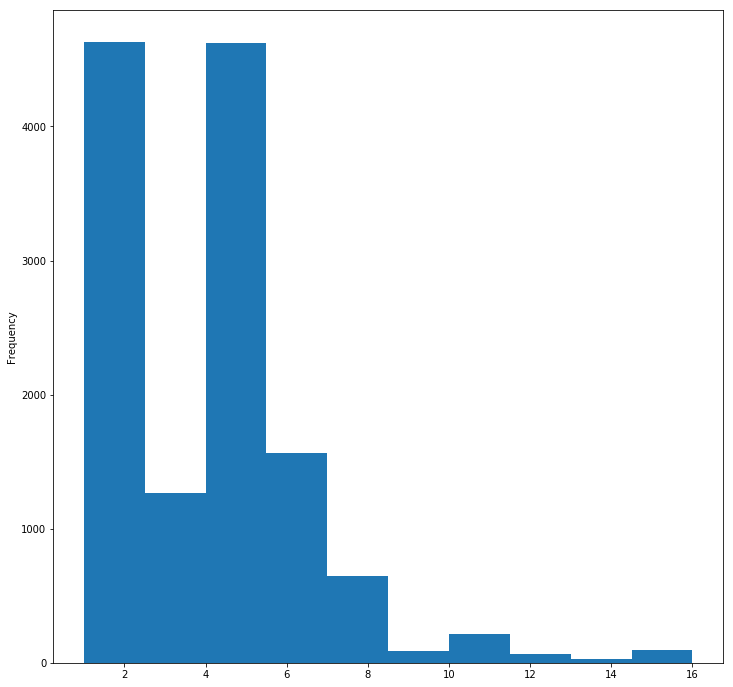

In [5]:
airbnb['accommodates'].plot.hist();

In [10]:
def numerical_variable_distribution(df, col):
    df[col].plot.kde()
    plt.xlabel('Variable "{}" Distribution'.format(col))
    plt.show()

In [11]:
numerical_columns = airbnb.select_dtypes(np.number).columns.tolist()

In [12]:
from ipywidgets import interact, fixed

In [13]:
interact(numerical_variable_distribution, 
         col=numerical_columns, df=fixed(airbnb));

interactive(children=(Dropdown(description='col', options=('room_id', 'host_id', 'reviews', 'overall_satisfact…

In [14]:
from scipy import stats

In [15]:
def numerical_variable_normality(col):
    stats.probplot(airbnb[col], plot=plt)
    plt.xlabel('Probability plot for variable {}'.format(col))
    plt.show()

In [16]:
interact(numerical_variable_normality, col=numerical_columns);

interactive(children=(Dropdown(description='col', options=('room_id', 'host_id', 'reviews', 'overall_satisfact…

In [18]:
for num_col in numerical_columns:
    _, pval = stats.normaltest(airbnb[num_col][airbnb[num_col].notnull()])
    if(pval < 0.05):
        print("Column {} doesn't follow a normal distribution".format(num_col))

Column room_id doesn't follow a normal distribution
Column host_id doesn't follow a normal distribution
Column reviews doesn't follow a normal distribution
Column overall_satisfaction doesn't follow a normal distribution
Column accommodates doesn't follow a normal distribution
Column bedrooms doesn't follow a normal distribution
Column price doesn't follow a normal distribution


### Categorical Variable Distribution

In [19]:
def categorical_variable_distribution(col):
    airbnb[col].value_counts(ascending=True,normalize=True).tail(20).plot.barh()
    plt.show()

In [20]:
categorical_columns = airbnb.select_dtypes(
    ['object', 'category']).columns.tolist()

In [21]:
interact(categorical_variable_distribution, col=categorical_columns);

interactive(children=(Dropdown(description='col', options=('room_type', 'neighborhood', 'accommodation_types',…

### Conclusion 

- No numerical variables follow a normal distribution 
- A majority of the listings are in a few neighborhoods, with Santa Maria Maior having over 20%.
- About 35% of the listings are considered very small based on how many the accommodate. 
- The satisfaction type variable is almost evenly distributed across all categories. 
- The price type variable is also almost evenly distributed. 